In [1]:
import pandas as pd
import numpy as np
import mysql.connector
import matplotlib.pyplot as plt

In [2]:
conn = mysql.connector.connect(
  host="localhost",
  db = "babynames",
  user="root",
  password="123456789"
)

In [3]:
babynames = pd.read_sql('SELECT * from vornamen', conn)

C:\Users\matte\AppData\Local\Temp\ipykernel_23716\4247649448.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  babynames = pd.read_sql('SELECT * from vornamen', conn)


In [4]:
babynames.head()

,jahr_id,bezirk_id,geschlecht_bin,vorname,anzahl
0,1984,101,1,Andreas,4
1,1984,101,1,Bernd,1
2,1984,101,1,Christian,2
3,1984,101,1,Christoph,2
4,1984,101,1,Clemens,1


In [5]:
genderneutral_names = pd.read_sql('SELECT v.vorname, count(v.anzahl) AS Anzahl, v.geschlecht_bin, v.jahr_id, v.bezirk_id FROM vornamen v JOIN geschlvorn g ON v.vorname = g.vorname GROUP BY v.vorname, v.geschlecht_bin, v.jahr_id, v.bezirk_id ORDER BY v.vorname;', conn)

C:\Users\matte\AppData\Local\Temp\ipykernel_23716\786899070.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  genderneutral_names = pd.read_sql('SELECT v.vorname, count(v.anzahl) AS Anzahl, v.geschlecht_bin, v.jahr_id, v.bezirk_id FROM vornamen v JOIN geschlvorn g ON v.vorname = g.vorname GROUP BY v.vorname, v.geschlecht_bin, v.jahr_id, v.bezirk_id ORDER BY v.vorname;', conn)


In [6]:
genderneutral_names.head()

,vorname,Anzahl,geschlecht_bin,jahr_id,bezirk_id
0,Abir,1,1,2007,920
1,Abir,1,1,2015,209
2,Abir,1,1,2019,701
3,Abir,1,2,2004,601
4,Abir,1,2,2011,501


In [7]:
genderneutral_names.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97275 entries, 0 to 97274
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   vorname         97275 non-null  object
 1   Anzahl          97275 non-null  int64 
 2   geschlecht_bin  97275 non-null  int64 
 3   jahr_id         97275 non-null  int64 
 4   bezirk_id       97275 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 3.7+ MB


In [8]:
#genderneutral names per year
names_per_year = genderneutral_names.groupby('jahr_id')['Anzahl'].sum().reset_index()
names_per_year.head()

,jahr_id,Anzahl
0,1984,1165
1,1985,1185
2,1986,1252
3,1987,1240
4,1988,1280


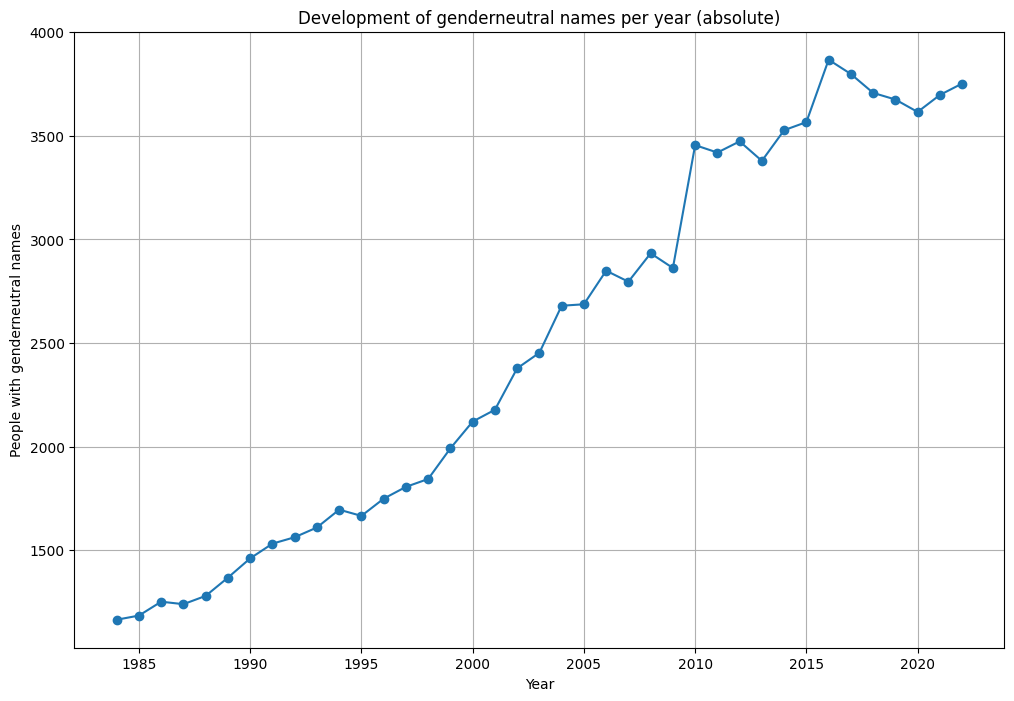

In [9]:
#plot of absolute numbers
plt.figure(figsize=(12, 8))
plt.plot(names_per_year['jahr_id'], names_per_year['Anzahl'], marker='o')

plt.title('Development of genderneutral names per year (absolute)')
plt.xlabel('Year')
plt.ylabel('People with genderneutral names')
plt.grid(True)
plt.show()

In [10]:
year_gender_genderneutral = genderneutral_names.groupby(['jahr_id','geschlecht_bin'])['Anzahl'].sum().reset_index()
year_gender_genderneutral.head()

,jahr_id,geschlecht_bin,Anzahl
0,1984,1,545
1,1984,2,620
2,1985,1,581
3,1985,2,604
4,1986,1,616


In [13]:
#names per year general
babynames_py = babynames.groupby('jahr_id')['anzahl'].sum().reset_index()
babynames_py.head()

,jahr_id,anzahl
0,1984,83856
1,1985,82379
2,1986,82056
3,1987,81351
4,1988,82545


In [14]:
relative_counts = merged_df = pd.merge(babynames_py, names_per_year, on='jahr_id')
relative_counts['relative_number'] = relative_counts['Anzahl'] / relative_counts['anzahl']
relative_counts.head()

,jahr_id,anzahl,Anzahl,relative_number
0,1984,83856,1165,0.013893
1,1985,82379,1185,0.014385
2,1986,82056,1252,0.015258
3,1987,81351,1240,0.015243
4,1988,82545,1280,0.015507


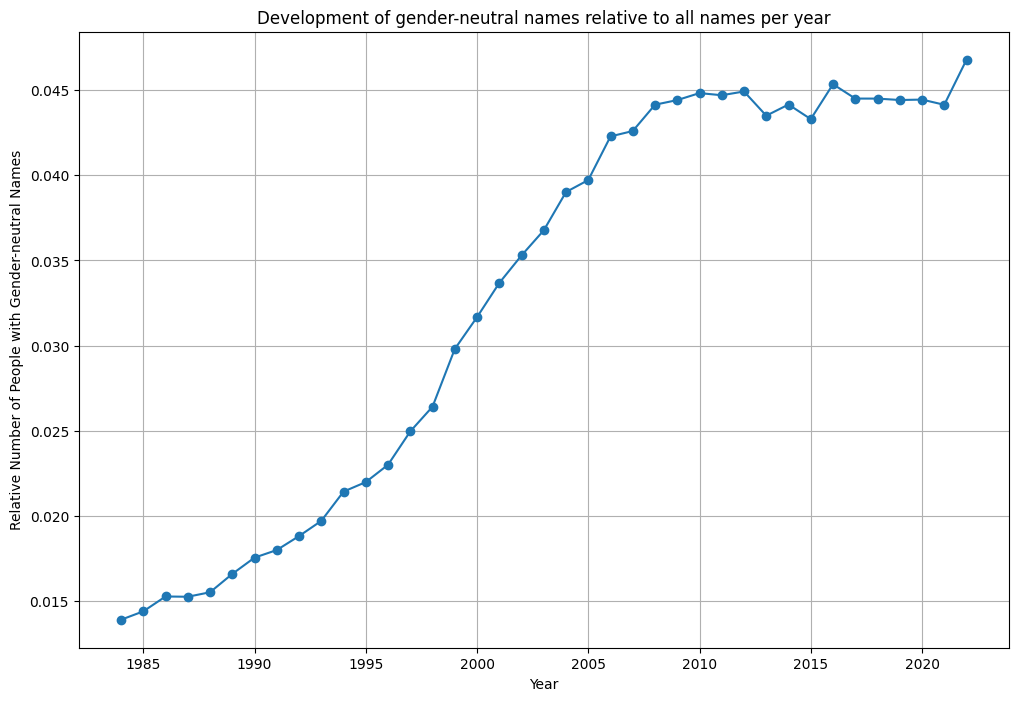

In [15]:
# Plot the line chart
plt.figure(figsize=(12, 8))
plt.plot(relative_counts['jahr_id'], relative_counts['relative_number'], marker='o')

plt.title('Development of gender-neutral names relative to all names per year')
plt.xlabel('Year')
plt.ylabel('Relative Number of People with Gender-neutral Names')
plt.grid(True)
plt.show()

In [16]:
genderneutral_assigned_1 = genderneutral_names[genderneutral_names['geschlecht_bin']==1]
genderneutral_assigned_2 = genderneutral_names[genderneutral_names['geschlecht_bin']==2]

In [17]:
assigned_1_per_year = genderneutral_assigned_1.groupby('jahr_id')['Anzahl'].sum().reset_index()
assigned_2_per_year = genderneutral_assigned_2.groupby('jahr_id')['Anzahl'].sum().reset_index()

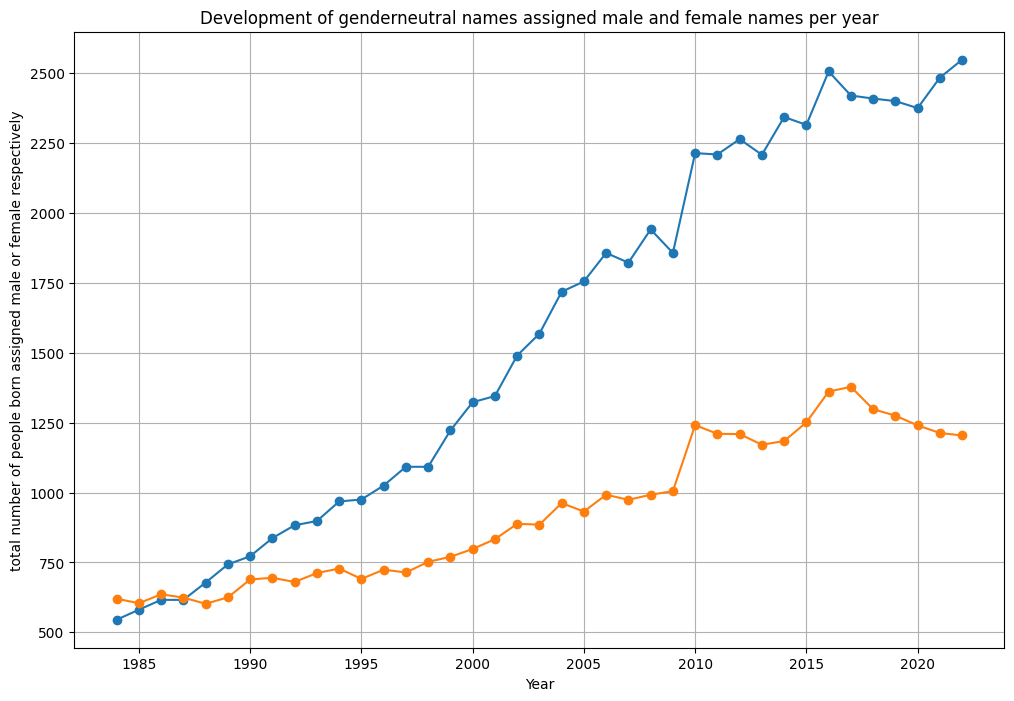

In [18]:
plt.figure(figsize=(12, 8))
plt.plot(assigned_1_per_year['jahr_id'], assigned_1_per_year['Anzahl'], marker='o')
plt.plot(assigned_2_per_year['jahr_id'], assigned_2_per_year['Anzahl'], marker='o')
plt.title('Development of genderneutral names assigned male and female names per year')
plt.xlabel('Year')
plt.ylabel('total number of people born assigned male or female respectively')
plt.grid(True)
plt.show()

In [27]:
male_assigned1_merged = pd.merge(males_names_per_year, assigned_1_per_year, on='jahr_id', suffixes=('_male', '_genderneutral'))
female_assigned2_merged = pd.merge(females_names_per_year, assigned_2_per_year, on='jahr_id')

In [28]:
male_assigned1_merged['percentage'] = male_assigned1_merged['Anzahl'] / male_assigned1_merged['anzahl']
female_assigned2_merged['percentage'] = female_assigned2_merged['Anzahl'] / female_assigned2_merged['anzahl']
print(male_assigned1_merged.head())
print(female_assigned2_merged.head())

   jahr_id   anzahl  Anzahl  percentage
0     1984  42758.0     545    0.012746
1     1985  42416.0     581    0.013698
2     1986  42062.0     616    0.014645
3     1987  41653.0     616    0.014789
4     1988  42519.0     678    0.015946
   jahr_id   anzahl  Anzahl  percentage
0     1984  41098.0     620    0.015086
1     1985  39963.0     604    0.015114
2     1986  39994.0     636    0.015902
3     1987  39698.0     624    0.015719
4     1988  40026.0     602    0.015040


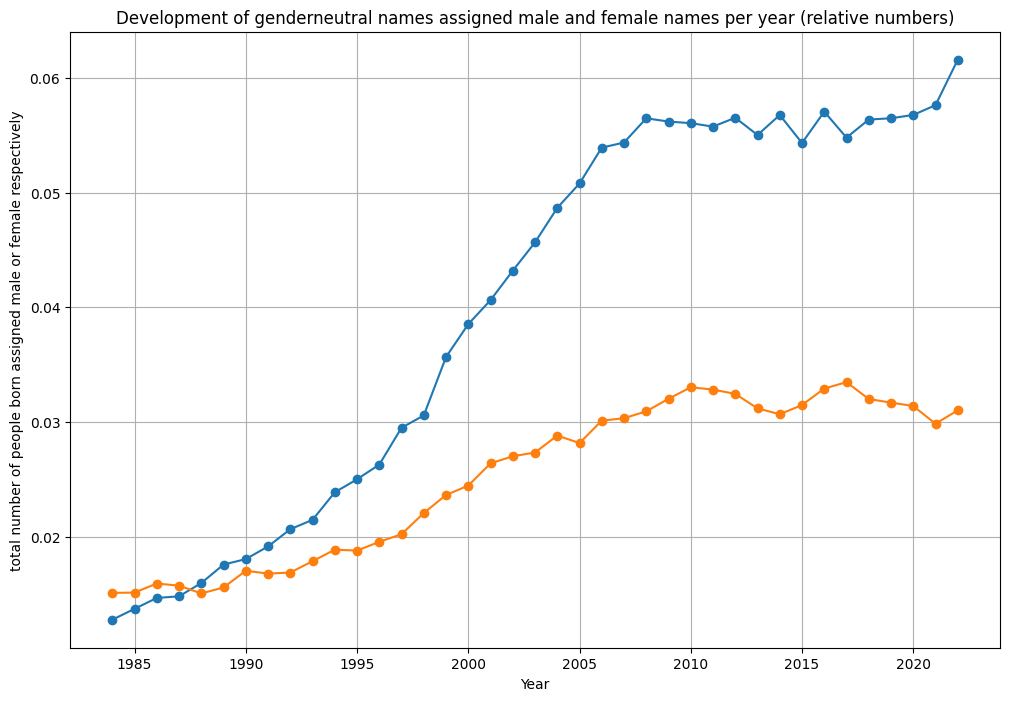

In [29]:
plt.figure(figsize=(12, 8))
plt.plot(male_assigned1_merged['jahr_id'], male_assigned1_merged['percentage'], marker='o')
plt.plot(female_assigned2_merged['jahr_id'], female_assigned2_merged['percentage'], marker='o')
plt.title('Development of genderneutral names assigned male and female names per year (relative numbers)')
plt.xlabel('Year')
plt.ylabel('total number of people born assigned male or female respectively')
plt.grid(True)
plt.show()

In [30]:
#most_pop_malenames
male_names = pd.read_sql('SELECT DISTINCT jahr_id, vorname, anzahl FROM names_per_year WHERE geschlecht_bin = "1" ORDER BY Anzahl DESC;', conn)

C:\Users\matte\AppData\Local\Temp\ipykernel_23716\2392885378.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  male_names = pd.read_sql('SELECT DISTINCT jahr_id, vorname, anzahl FROM names_per_year WHERE geschlecht_bin = "1" ORDER BY Anzahl DESC;', conn)


In [31]:
male_names.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82994 entries, 0 to 82993
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   jahr_id  82994 non-null  int64  
 1   vorname  82994 non-null  object 
 2   anzahl   82994 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.9+ MB


In [32]:
males_names_per_year = male_names.groupby('jahr_id')['anzahl'].sum().reset_index()
males_names_per_year.head()

,jahr_id,anzahl
0,1984,42758.0
1,1985,42416.0
2,1986,42062.0
3,1987,41653.0
4,1988,42519.0


In [33]:
#mostpop_femalenames
female_names = pd.read_sql('SELECT DISTINCT jahr_id, vorname, anzahl FROM names_per_year WHERE geschlecht_bin = "2" ORDER BY Anzahl DESC;', conn)

C:\Users\matte\AppData\Local\Temp\ipykernel_23716\786493315.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  female_names = pd.read_sql('SELECT DISTINCT jahr_id, vorname, anzahl FROM names_per_year WHERE geschlecht_bin = "2" ORDER BY Anzahl DESC;', conn)


In [34]:
females_names_per_year = female_names.groupby('jahr_id')['anzahl'].sum().reset_index()
females_names_per_year.head()

,jahr_id,anzahl
0,1984,41098.0
1,1985,39963.0
2,1986,39994.0
3,1987,39698.0
4,1988,40026.0


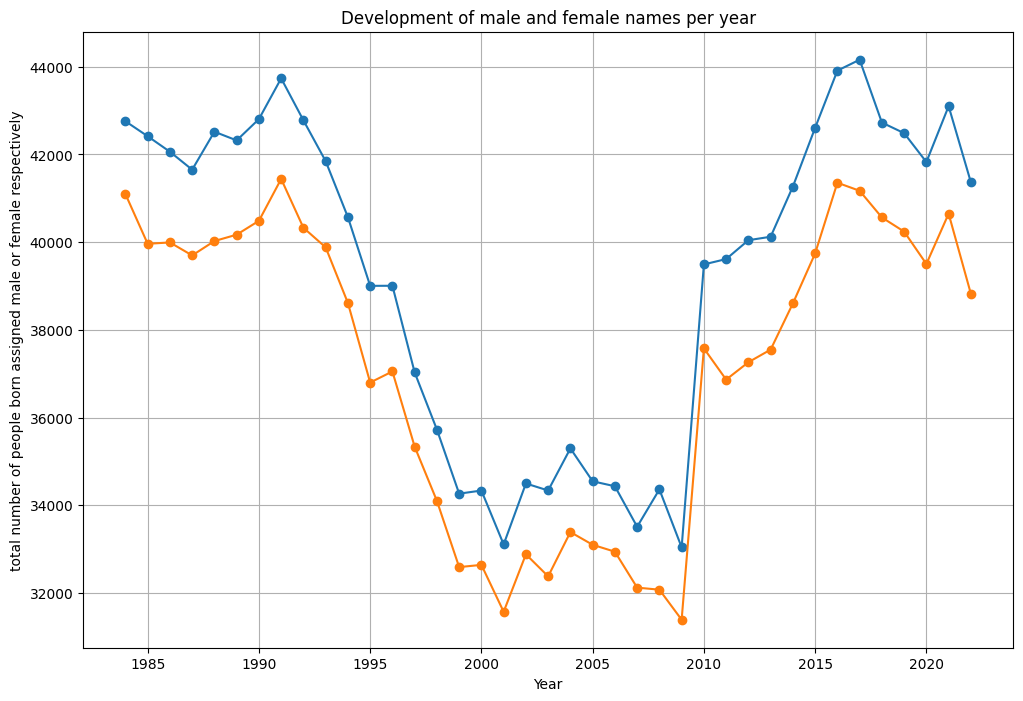

In [35]:
plt.figure(figsize=(12, 8))
plt.plot(males_names_per_year['jahr_id'], males_names_per_year['anzahl'], marker='o')
plt.plot(females_names_per_year['jahr_id'], females_names_per_year['anzahl'], marker='o')
plt.title('Development of male and female names per year')
plt.xlabel('Year')
plt.ylabel('total number of people born assigned male or female respectively')
plt.grid(True)
plt.show()

In [36]:
genderneutral_count = pd.read_sql('SELECT v.vorname, sum(v.anzahl) AS Anzahl, v.geschlecht_bin, v.jahr_id FROM names_per_year v JOIN geschlvorn g ON v.vorname = g.vorname GROUP BY v.vorname, v.geschlecht_bin, v.jahr_id ORDER BY v.vorname;', conn)
genderneutral_count.head()

C:\Users\matte\AppData\Local\Temp\ipykernel_23716\3328668579.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  genderneutral_count = pd.read_sql('SELECT v.vorname, sum(v.anzahl) AS Anzahl, v.geschlecht_bin, v.jahr_id FROM names_per_year v JOIN geschlvorn g ON v.vorname = g.vorname GROUP BY v.vorname, v.geschlecht_bin, v.jahr_id ORDER BY v.vorname;', conn)


,vorname,Anzahl,geschlecht_bin,jahr_id
0,Abir,1.0,1,2007
1,Abir,1.0,1,2015
2,Abir,1.0,1,2019
3,Abir,1.0,2,2004
4,Abir,1.0,2,2011
